In [1]:
# All the packages

import tkinter as tk 
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import seaborn as sb
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from operator import itemgetter
from urllib.request import urlopen
from bs4 import BeautifulSoup
import plotly.graph_objects as go

In [2]:
playerstats = pd.read_csv('Fan_Duel.csv')
playerstats

,ID,Player_name,Date,Team,Opp,H/A,GTime(ET),Team pts,Opp pts,Win-Lose,...,rb,as,st,bl,to,trey,FGM,FGA,FTM,FTA
0,5679,Drew_Eubanks,20200110,sas,mem,0,20.0,121.0,134.0,0,...,0,0,0,0,0,0,0,0,2,2
1,5679,Drew_Eubanks,20200108,sas,bos,0,19.0,129.0,114.0,1,...,0,0,0,0,0,0,1,1,0,0
2,5679,Drew_Eubanks,20191228,sas,det,1,20.5,136.0,109.0,1,...,3,0,0,0,0,0,3,3,0,0
3,5679,Drew_Eubanks,20191203,sas,hou,1,20.5,135.0,133.0,1,...,2,1,0,0,1,0,1,1,0,0
4,5679,Drew_Eubanks,20191201,sas,det,0,17.0,98.0,132.0,0,...,8,1,0,1,2,0,4,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15634,4817,Willie_Cauley-Stein,20191106,gsw,hou,0,19.5,112.0,129.0,0,...,4,2,0,0,0,0,1,6,2,2
15635,4817,Willie_Cauley-Stein,20191104,gsw,por,1,22.5,127.0,118.0,1,...,3,2,2,0,1,0,4,5,2,2
15636,4817,Willie_Cauley-Stein,20191102,gsw,cha,1,20.5,87.0,93.0,0,...,8,2,1,1,0,0,4,7,0,0
15637,4817,Willie_Cauley-Stein,20191101,gsw,sas,1,22.5,110.0,127.0,0,...,5,0,1,0,0,0,3,7,0,0


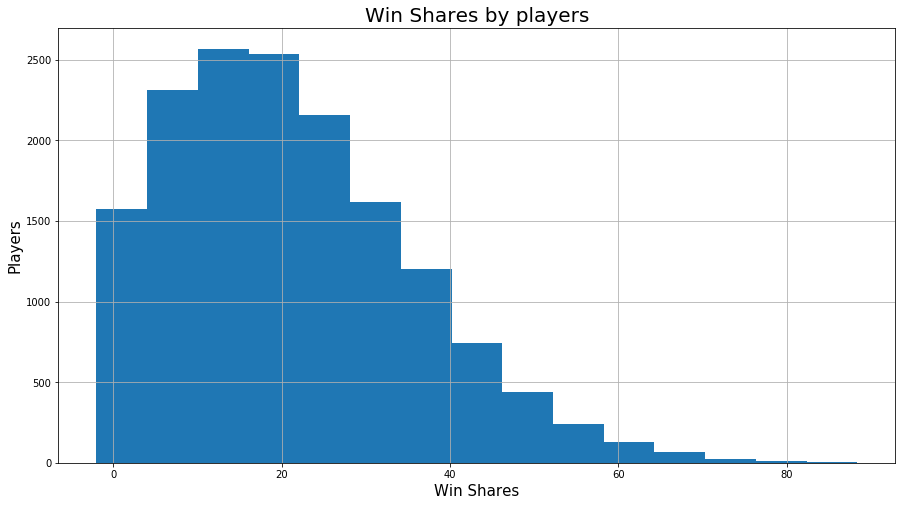

In [3]:
# Plot win shares by players to see how they are distributed
player_FDP= playerstats[['Player_name', 'FDP']]

plt.figure(figsize = (15,8))
plt.hist(player_FDP['FDP'], bins = 15)
plt.grid()
plt.xlabel('Win Shares', size = 15)
plt.ylabel('Players', size = 15)
plt.title('Win Shares by players', size = 20);

In [4]:
playerstats.columns

Index(['ID', 'Player_name', 'Date', 'Team', 'Opp', 'H/A', 'GTime(ET)',
       'Team pts', 'Opp pts', 'Win-Lose', 'Start', 'Mins_played', 'GP',
       'active', 'FDP', 'DoubleD', 'TripleD', 'FD Sal', 'FD pos', 'ADI', 'VMI',
       'pt', 'rb', 'as', 'st', 'bl', 'to', 'trey', 'FGM', 'FGA', 'FTM', 'FTA'],
      dtype='object')

In [5]:
# bins = [-10, 10, 20, 30, 40, 100]
# group_names = ['benchPlayer','belowAvg','average','advanced','top']
# playerstats['Rank']= pd.cut(playerstats['FDP'],bins,labels=group_names)

In [6]:
# playerstats

In [7]:
df = pd.get_dummies(playerstats)
df

,ID,Date,H/A,GTime(ET),Team pts,Opp pts,Win-Lose,Start,Mins_played,GP,...,Opp_okc,Opp_orl,Opp_phi,Opp_pho,Opp_por,Opp_sac,Opp_sas,Opp_tor,Opp_uta,Opp_was
0,5679,20200110,0,20.0,121.0,134.0,0,0.0,1.766667,1.0,...,0,0,0,0,0,0,0,0,0,0
1,5679,20200108,0,19.0,129.0,114.0,1,0.0,2.266667,1.0,...,0,0,0,0,0,0,0,0,0,0
2,5679,20191228,1,20.5,136.0,109.0,1,0.0,3.116667,1.0,...,0,0,0,0,0,0,0,0,0,0
3,5679,20191203,1,20.5,135.0,133.0,1,0.0,6.266667,1.0,...,0,0,0,0,0,0,0,0,0,0
4,5679,20191201,0,17.0,98.0,132.0,0,0.0,21.816667,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15634,4817,20191106,0,19.5,112.0,129.0,0,1.0,19.983333,1.0,...,0,0,0,0,0,0,0,0,0,0
15635,4817,20191104,1,22.5,127.0,118.0,1,1.0,15.500000,1.0,...,0,0,0,0,1,0,0,0,0,0
15636,4817,20191102,1,20.5,87.0,93.0,0,1.0,21.216667,1.0,...,0,0,0,0,0,0,0,0,0,0
15637,4817,20191101,1,22.5,110.0,127.0,0,1.0,17.016667,1.0,...,0,0,0,0,0,0,1,0,0,0


In [8]:
bins = [-10, 10, 20, 30, 40, 100]
group_names = ['benchPlayer','belowAvg','average','advanced','top']
df['Rank']= pd.cut(df['FDP'],bins,labels=group_names)

In [9]:
df

,ID,Date,H/A,GTime(ET),Team pts,Opp pts,Win-Lose,Start,Mins_played,GP,...,Opp_orl,Opp_phi,Opp_pho,Opp_por,Opp_sac,Opp_sas,Opp_tor,Opp_uta,Opp_was,Rank
0,5679,20200110,0,20.0,121.0,134.0,0,0.0,1.766667,1.0,...,0,0,0,0,0,0,0,0,0,benchPlayer
1,5679,20200108,0,19.0,129.0,114.0,1,0.0,2.266667,1.0,...,0,0,0,0,0,0,0,0,0,benchPlayer
2,5679,20191228,1,20.5,136.0,109.0,1,0.0,3.116667,1.0,...,0,0,0,0,0,0,0,0,0,benchPlayer
3,5679,20191203,1,20.5,135.0,133.0,1,0.0,6.266667,1.0,...,0,0,0,0,0,0,0,0,0,benchPlayer
4,5679,20191201,0,17.0,98.0,132.0,0,0.0,21.816667,1.0,...,0,0,0,0,0,0,0,0,0,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15634,4817,20191106,0,19.5,112.0,129.0,0,1.0,19.983333,1.0,...,0,0,0,0,0,0,0,0,0,belowAvg
15635,4817,20191104,1,22.5,127.0,118.0,1,1.0,15.500000,1.0,...,0,0,0,1,0,0,0,0,0,average
15636,4817,20191102,1,20.5,87.0,93.0,0,1.0,21.216667,1.0,...,0,0,0,0,0,0,0,0,0,average
15637,4817,20191101,1,22.5,110.0,127.0,0,1.0,17.016667,1.0,...,0,0,0,0,0,1,0,0,0,belowAvg


In [10]:
X = df.drop("Rank", axis=1)
y = df["Rank"]
print(X.shape, y.shape)

(15639, 585) (15639,)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [12]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)

In [13]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [15]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:

# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=585))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=5, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [18]:

# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               58600     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 505       
Total params: 69,205
Trainable params: 69,205
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 2s - loss: 0.7129 - acc: 0.7074
Epoch 2/100
 - 1s - loss: 0.2645 - acc: 0.8956
Epoch 3/100
 - 1s - loss: 0.1869 - acc: 0.9239
Epoch 4/100
 - 1s - loss: 0.1549 - acc: 0.9396
Epoch 5/100
 - 1s - loss: 0.1312 - acc: 0.9459
Epoch 6/100
 - 1s - loss: 0.1064 - acc: 0.9586
Epoch 7/100
 - 1s - loss: 0.0935 - acc: 0.9624
Epoch 8/100
 - 1s - loss: 0.0775 - acc: 0.9702
Epoch 9/100
 - 1s - loss: 0.0780 - acc: 0.9685
Epoch 10/100
 - 1s - loss: 0.0587 - acc: 0.9788
Epoch 11/100
 - 1s - loss: 0.0486 - acc: 0.9830
Epoch 12/100
 - 1s - loss: 0.0517 - acc: 0.9818
Epoch 13/100
 - 1s - loss: 0.0390 - acc: 0.9864
Epoch 14/100
 - 1s - loss: 0.0357 - acc: 0.9886
Epoch 15/100
 - 1s - loss: 0.0270 - acc: 0.9917
Epoch 16/100
 - 1s - loss: 0.0351 - acc: 0.9870
Epoch 17/100
 - 1s - loss: 0.0235 - acc: 0.9928
Epoch 18/100
 - 1s - loss: 0.0249 - acc: 0.9915
Epoch 19/100
 - 1s - loss: 0.0305 - acc: 0.9884
Epoch 20/100
 - 1s - loss: 0.0324 - acc: 0.9882
E

In [21]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

 - 0s - loss: 0.4052 - acc: 0.9174
Normal Neural Network - Loss: 0.4052481498997992, Accuracy: 0.917391300201416


In [22]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [23]:

print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: ['advanced' 'belowAvg' 'advanced' 'belowAvg' 'top']
Actual Labels: ['advanced', 'belowAvg', 'advanced', 'belowAvg', 'advanced']


In [24]:

# Save the model
model.save("FDP_model_trained.h5")

In [25]:
# Load the model
from tensorflow.keras.models import load_model
voice_model = load_model("FDP_model_trained.h5")

In [26]:
model_loss, model_accuracy = voice_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

 - 0s - loss: 0.4052 - acc: 0.9174
Normal Neural Network - Loss: 0.4052481498997992, Accuracy: 0.917391300201416
